1.  What is Simple Linear Regression?

- Simple Linear Regression is a statistical method used to study the relationship between two variables:

   - Independent variable (X) → the predictor or input.

   - Dependent variable (Y) → the outcome or value we want to predict.

2. What are the key assumptions of Simple Linear Regression ?

- Linearity
- Independence of Errors
- Homoscedasticity (Constant Variance of Error)
- Normality of Errors
- Perfect Multicollinearity


3.  What is heteroscedasticity, and why is it important to address in regression models?
- In regression, heteroscedasticity means that the variance of the errors (residuals) is not constant across all levels of the independent variable(s).

- It is important to address in regression models because :

  - Biased Standard Errors
  - Less Efficient Estimates
  - Prediction Issues

4. What is Multiple Linear Regression?
- Multiple Linear Regression (MLR) is an extension of Simple Linear Regression that allows us to model the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, …, Xₖ).

5.  What is polynomial regression, and how does it differ from linear regression?  
- Polynomial Regression is a type of regression analysis where the relationship between the independent variable (X) and the dependent variable (Y) is modeled as an n-th degree polynomial.

 - Polynomial Regression, on the other hand, extends linear regression by adding higher-degree terms. This allows the model to capture curves and more complex patterns in data. However, while polynomial regression provides more flexibility and can fit nonlinear trends, it also carries a higher risk of overfitting and is harder to interpret compared to linear regression.

Intercept (β0): 0.17999999999999794
Slope (β1): 1.9800000000000004


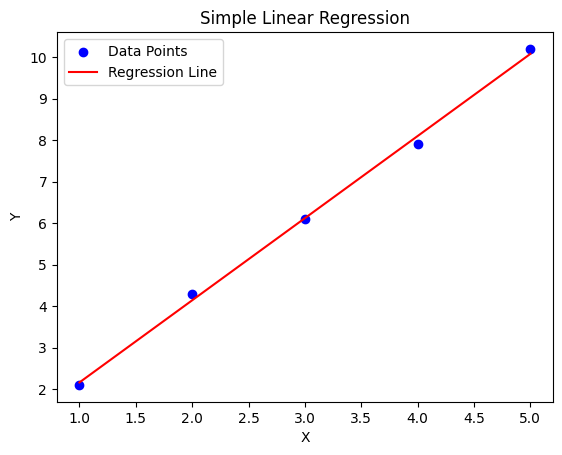

In [1]:
#6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


In [2]:
#7.  Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000] ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = {
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)
X = df[["Area", "Rooms"]]
y = df["Price"]

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()

print(model.summary())

vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Wed, 01 Oct 2025   Prob (F-statistic):             0.0377
Time:                        19:06:44   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Polynomial Coefficients (degree 2): [0.2  1.94 0.06]


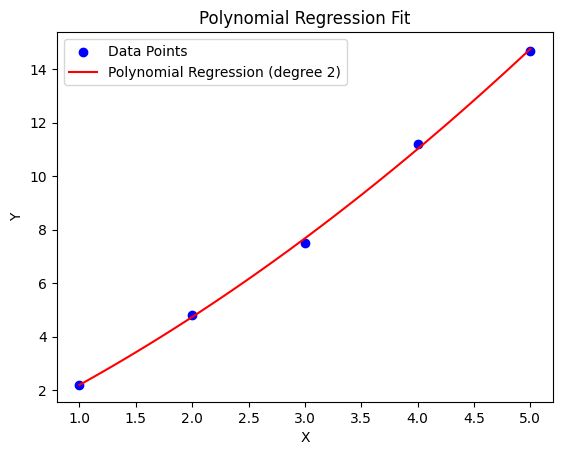

In [3]:
#8.  Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])
coefficients = np.polyfit(X, Y, deg=2)
polynomial = np.poly1d(coefficients)

X_fit = np.linspace(min(X), max(X), 100)
Y_fit = polynomial(X_fit)

print("Polynomial Coefficients (degree 2):", coefficients)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X_fit, Y_fit, color='red', label='Polynomial Regression (degree 2)')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()


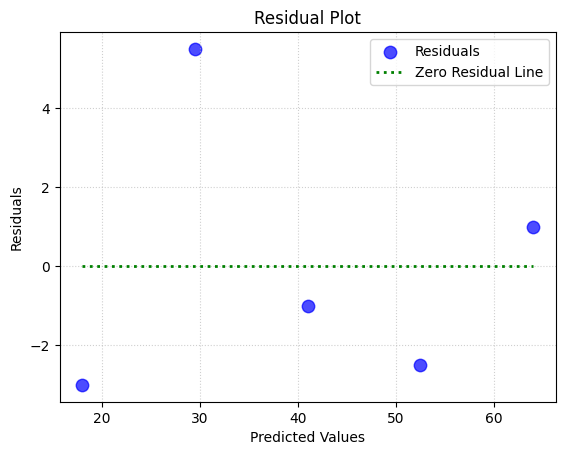

In [13]:
#9. Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)


Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.scatter(Y_pred, residuals, color='blue', label="Residuals", s=80, alpha=0.7)
plt.plot([min(Y_pred), max(Y_pred)], [0, 0], color='green', linestyle=':', linewidth=2, label="Zero Residual Line")

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.grid(True, linestyle=':', alpha=.6)
plt.show()



10.  Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

- 1. Address Multicollinearity

  - Multicollinearity means predictors overlap in information, which inflates variance of coefficient estimates and makes them unstable.

- 2. Address Heteroscedasticity

  - Heteroscedasticity means the variance of residuals changes across predicted values — this violates regression assumptions and affects confidence intervals.

- 3. Model Validation

  - After addressing these issues:

    1. Split dataset: Train/test split to evaluate performance.

    2. Cross-validation: Use k-fold CV to ensure generalization.

    3. Check assumptions again:

       Residual plot → check for constant variance.

       VIF → check multicollinearity.

   4. Evaluate metrics:

       R², Adjusted R², RMSE (Root Mean Squared Error).